In [1]:
#lib import
import pandas as pd
import numpy as np

In [2]:
#input
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#just check the size
print("Train data shape:", train.shape)
print("Test data shape:",test.shape)


Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
#explore data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1]:
#Do some data visualization during explore stage
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
#rcparams means row colom to define some paramters
plt.rcParams['figure.figsize']=(10,6)


In [6]:
#######Step2 explore data and engineer feature
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


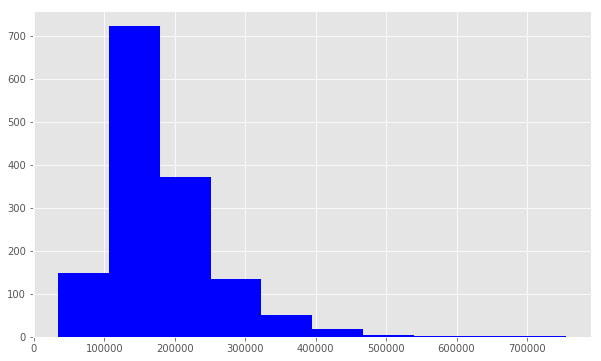

In [7]:
#plot the skew of the data
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')
plt.show()


Skew is: 0.121335062205


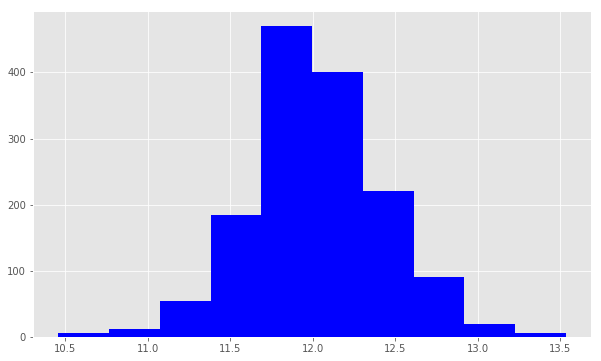

In [8]:
#plot the hist after data-transformation
target=np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target,color='blue')
plt.show()

In [9]:
#select_dtypes will return columns meet our request
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
#correlation
corr=numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [11]:
#advanced analysis
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)


In [12]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


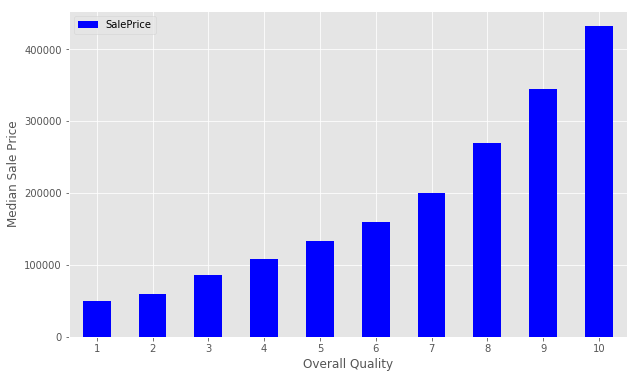

In [13]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
#rotation means rotate the label words
plt.xticks(rotation=0)
plt.show()

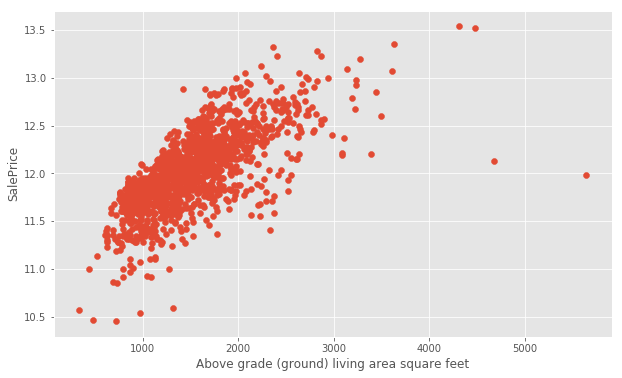

In [14]:
#plot the scatter
plt.scatter(x=train['GrLivArea'],y=target)
plt.ylabel('SalePrice')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()


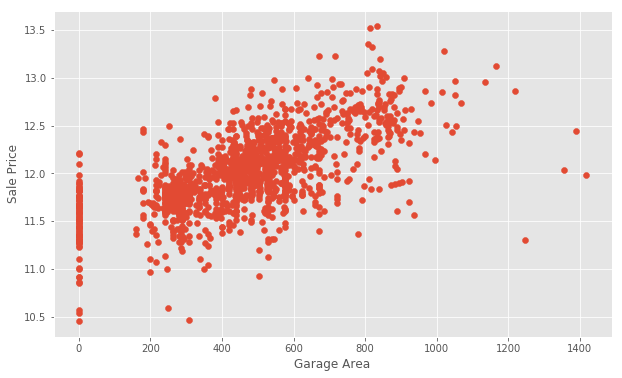

In [15]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#from this part we can see that some data point garage=0 
#so here we found the outliers 

In [16]:
train=train[train['GarageArea']<1200] #only G area <1200 will show


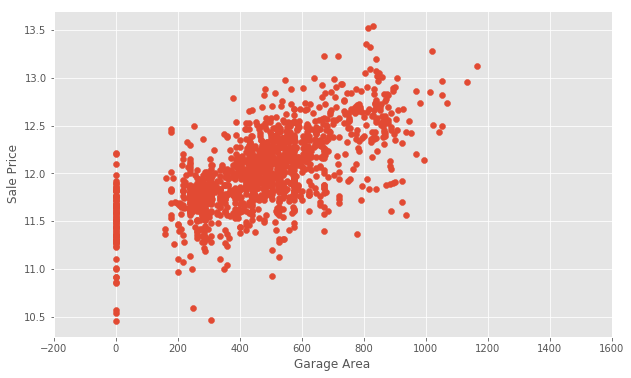

In [17]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [18]:
#########Dealing with Null Values

nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Feature'
nulls



,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [19]:
# see the unique value
#unique value means the all data occurs in array
print("Unique values are:", train.MiscFeature.unique())


Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [20]:
#See all non-numerical variable
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [21]:
########
#Transforming and engineering features
print("Original: \n")
print(train.Street.value_counts(),"\n")


Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [25]:
#one hot encoding
train['enc_street']=pd.get_dummies(train.Street,drop_first=True)
##???##train or test data
test['enc_street']=pd.get_dummies(test.Street,drop_first=True)

In [23]:
print('Encoding: \n')
print(train.enc_street.value_counts())


Encoding: 

1    1450
0       5
Name: enc_street, dtype: int64


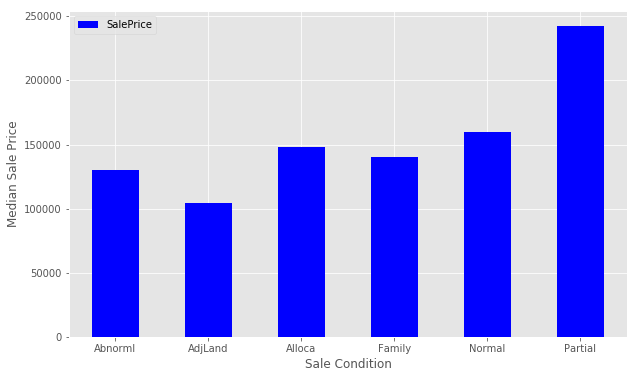

In [24]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
##define a function to convert one hot
def encode(x):return 1 if x=='Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)


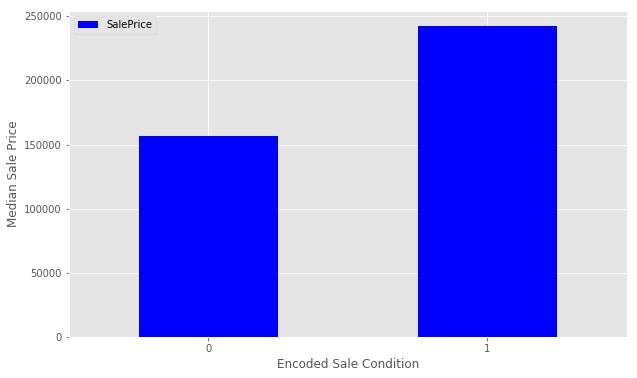

In [27]:
##plot
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


#############
##Here, we can try to figure more feature to make model performance better

In [28]:
#Here we solve the missing data with interpolate method
#We also can use like smoothing method to solve this problem
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [30]:
sum(data.isnull().sum()!=0)


0

In [33]:
#############
#Build linear model#
#############

#set x,y to model
y=np.log(train.SalePrice)
X=data.drop(['SalePrice','Id'],axis=1)


In [34]:
#split data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [35]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [36]:
model=lr.fit(X_train,y_train)


In [40]:
print("R^2 is : \n", model.score(X_test,y_test))


R^2 is : 
 0.888247770926


In [41]:
###Make prediction
predictions=model.predict(X_test)


In [42]:
##compare the test_y and prediction  
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0178417945196


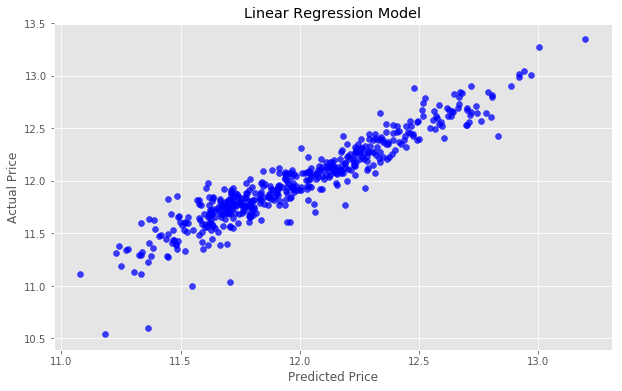

In [43]:
####plot the relationship
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

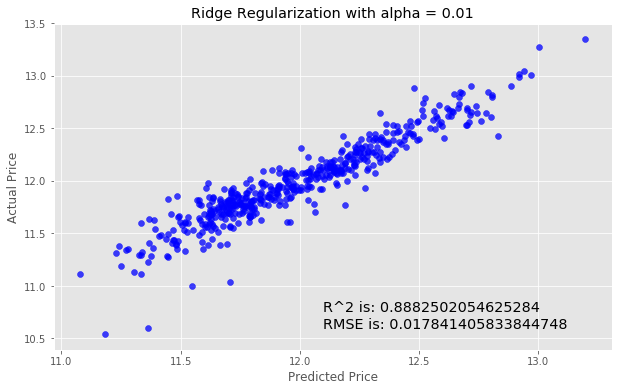

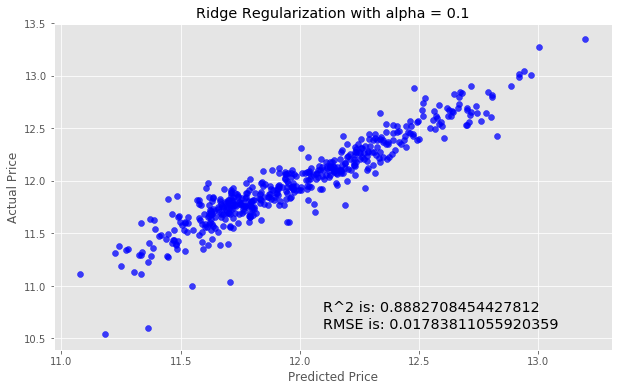

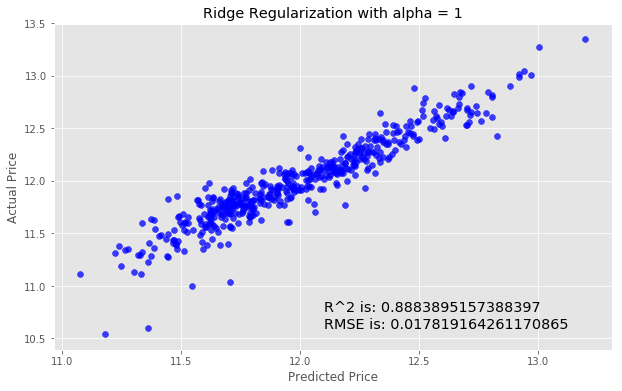

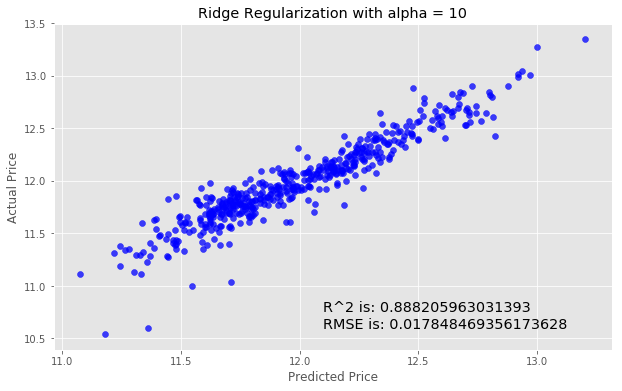

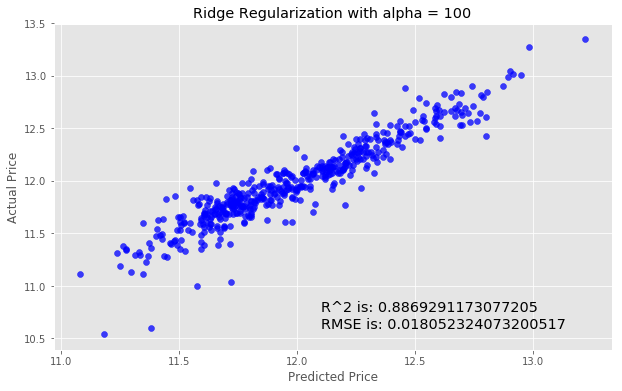

In [44]:
#using Ridge Regularization method and try some alpha
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [45]:
###submission to kaggle
submission=pd.DataFrame()
submission['Id']=test.Id
feats=test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()
predictions=model.predict(feats)

In [46]:
final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655] 

Final predictions are: 
 [ 128959.49172586  122920.74024361  175704.82598102  200050.83263755
  182075.46986404]


In [47]:
submission['SalePrice']=final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [48]:
submission.to_csv('submission1.csv', index=False)